In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#Model features to this degree, 3 gives best r-squared value
degree = 3

house_price_train = np.array([240,260,360,420,350,285])
size_train = np.array([1200,1400,2600,2700,2400,1450])

house_test = np.array([250, 270, 289, 320, 400, 319])
size_test = np.array([1400, 1600, 2000, 2400, 2600, 2200])

#Scale size_train feature
scl_size_train = (size_train - np.mean(size_train)) / np.ptp(size_train)
scl_size_test = (size_test - np.mean(size_test)) / np.ptp(size_test)

polyFeatures = PolynomialFeatures(degree)

In [230]:
#Create polynomial features
X = size_train[:, np.newaxis]
X_test = size_test[:, np.newaxis]
X_poly = polyFeatures.fit_transform(X)
X_test_poly = polyFeatures.fit_transform(X_test)

#Scaled polynomial features
X_scl = scl_size_train[:, np.newaxis]
X_scl_poly = polyFeatures.fit_transform(X_scl)
X_test_scl = scl_size_test[:, np.newaxis]
X_test_scl_poly = polyFeatures.fit_transform(X_test_scl)

In [231]:
#Fit model
model = linear_model.LinearRegression()
model.fit(X_poly, house_price_train);

#Fit scaled model
model_scl = linear_model.LinearRegression()
model_scl.fit(X_scl_poly, house_price_train);

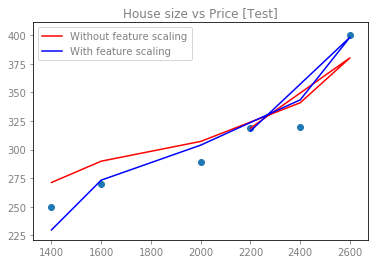

In [232]:
#Graph models
COLOR = 'grey'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

notScaled, = plt.plot(size_test, model.predict(X_test_poly), 'r', label='Without feature scaling');
scaled, = plt.plot(size_test, model_scl.predict(X_test_scl_poly), 'b', label='With feature scaling');
plt.scatter(size_test, house_test);
plt.legend(handles=[notScaled, scaled]);
plt.title('House size vs Price [Test]');

In [233]:
#Calculate errors in test set
print('r-squared score for test set:', r2_score(house_test, model.predict(X_test_poly)))
print('r-squared score for scaled test set:', r2_score(house_test, model_scl.predict(X_test_scl_poly)))

rmse = np.sqrt(mean_squared_error(house_test, model.predict(X_test_poly)))
rmse_scl = np.sqrt(mean_squared_error(house_test, model_scl.predict(X_test_scl_poly)))
print('RMSE in test set:', rmse)
print('RMSE in scaled test set:', rmse_scl)


r-squared score for test set: 0.8558385583609058
r-squared score for scaled test set: 0.9134436689926231
RMSE in test set: 18.273640924840947
RMSE in scaled test set: 14.159566191215774
